In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df_a = pd.read_excel("data/recognasum/train.xlsx")
df_b = pd.read_json("data/xlsum/portuguese_train.jsonl",lines=True)

In [3]:
df_a.head()

,Unnamed: 0,index,Titulo,Subtitulo,Noticia,Categoria,Autor,Data,URL,Autor_corrigido,Sumario
0,0,52037,Ex-BBB Paula se emociona com novo procedimento...,Ex-sister compartilhou vídeo da preparação par...,A ex-BBB 23 Paula Freitas compartilhou em suas...,Entretenimento,Extra,09/05/2023 10h53,https://extra.globo.com/entretenimento/noticia...,Extra,Ex-BBB Paula se emociona com novo procedimento...
1,1,45191,Trump sinaliza que anúncio de candidatura par...,"Em entrevista à New York Magazine, ex-presiden...",Gabby Orrda CNN Talvez no sinal mais forte até...,Internacional,CNN,14/07/2022 às 16:51 | Atualizado 14/07/2022 à...,https://www.cnnbrasil.com.br/internacional/tru...,CNN,Trump sinaliza que anúncio de candidatura para...
2,2,74910,Auxílio Emergencial 2021: Caixa começa a pagar...,Pagamento começa nesta quinta para trabalhador...,A Caixa Econômica Federal (Caixa) começa a pag...,Economia,Por G1,17/06/2021 00h00,https://g1.globo.com/economia/auxilio-emergenc...,G1,Auxílio Emergencial 2021: Caixa começa a pagar...
3,3,120941,Netflix lança novos recursos para controle dos...,Plataforma vai permitir que usuários coloquem ...,A empresa também adicionou um recurso para pro...,Política,Por Reuters,07/04/2020 22h02,https://g1.globo.com/economia/tecnologia/notic...,Reuters,Netflix lança novos recursos para controle dos...
4,4,114965,Estudo estima que 5% da população da Espanha c...,"Na região da capital, 11% da população teve te...","""O estudo constata que 5% da população espanho...",Ciência e Tecnologia,Por France Presse,13/05/2020 21h12,https://g1.globo.com/mundo/noticia/2020/05/13/...,France Presse,Estudo estima que 5% da população da Espanha c...


In [4]:
df_b.head()

,id,url,title,summary,text
0,121217_eua_enterro_massacre_escola_lgb,https://www.bbc.com/portuguese/ultimas_noticia...,EUA enterram mortos de massacre em escola,A comunidade de Newtown deu início nesta segun...,"Na última sexta-feira, um atirador abriu fogo ..."
1,brasil-44298193,https://www.bbc.com/portuguese/brasil-44298193,OCDE reduz previsão de crescimento do Brasil e...,A Organização para a Cooperação e Desenvolvime...,"Segundo organização, sistema de aposentadorias..."
2,031022_ivanlessamp,https://www.bbc.com/portuguese/noticias/story/...,Nas malhas da arte,"Em Manchester, a que não chamarei de “a Juiz d...",Nenhum deles é torturado ou forçado a dormir a...
3,brasil-40686894,https://www.bbc.com/portuguese/brasil-40686894,"Contra superbactérias, hospitais tentam conter...","No final de janeiro, a estudante macapaense Ad...",Uma das principais causas da resistência bacte...
4,041202_dolaraw,https://www.bbc.com/portuguese/economia/story/...,Dólar registra nova queda com incerteza sobre ...,O dólar registrou nesta quinta-feira novas bai...,"No início da tarde desta quinta-feira, o euro ..."


In [3]:
#removendo as colunas que nao serao usadas
df_a = df_a[["Noticia","Categoria", "Sumario"]]
df_b = df_b[["text","summary"]]

In [4]:
#adicionando a coluna categoria ao df_b e colocando todos os dados como none
df_b["Categoria"] = "None"

#renomeando as colunas para ficarem iguais
df_b = df_b.rename(columns={"text": "Noticia", "summary": "Sumario"})

df_b.head()

,Noticia,Sumario,Categoria
0,"Na última sexta-feira, um atirador abriu fogo ...",A comunidade de Newtown deu início nesta segun...,None
1,"Segundo organização, sistema de aposentadorias...",A Organização para a Cooperação e Desenvolvime...,None
2,Nenhum deles é torturado ou forçado a dormir a...,"Em Manchester, a que não chamarei de “a Juiz d...",None
3,Uma das principais causas da resistência bacte...,"No final de janeiro, a estudante macapaense Ad...",None
4,"No início da tarde desta quinta-feira, o euro ...",O dólar registrou nesta quinta-feira novas bai...,None


In [5]:
#concatenando os dois dataframes
df = pd.concat([df_a, df_b], ignore_index=True)


## Amostragem 2

In [6]:
#criando uma nova coluna com o numero de caracteres da noticia
df["Tamanho_noticia"] = df["Noticia"].apply(lambda x: len(x.split()))
df.head()

,Noticia,Categoria,Sumario,Tamanho_noticia
0,A ex-BBB 23 Paula Freitas compartilhou em suas...,Entretenimento,Ex-BBB Paula se emociona com novo procedimento...,200
1,Gabby Orrda CNN Talvez no sinal mais forte até...,Internacional,Trump sinaliza que anúncio de candidatura para...,413
2,A Caixa Econômica Federal (Caixa) começa a pag...,Economia,Auxílio Emergencial 2021: Caixa começa a pagar...,285
3,A empresa também adicionou um recurso para pro...,Política,Netflix lança novos recursos para controle dos...,140
4,"""O estudo constata que 5% da população espanho...",Ciência e Tecnologia,Estudo estima que 5% da população da Espanha c...,163


In [7]:
print(df["Tamanho_noticia"].quantile([0.25, 0.5, 0.75, 0.90, 0.99]))


0.25     200.0
0.50     344.0
0.75     620.0
0.90    1130.0
0.99    2534.0
Name: Tamanho_noticia, dtype: float64


In [8]:
#adicionando colunas curto, medio, longo e muito longo
df["Tamanho"] = "curto"
df.loc[df["Tamanho_noticia"] > 201, "Tamanho"] = "medio"
df.loc[df["Tamanho_noticia"] > 621, "Tamanho"] = "longo"
df.loc[df["Tamanho_noticia"] > 1000, "Tamanho"] = "muito longo"


In [20]:
len(df)

138565

In [21]:
#vendo a quantidade de vazios em df
print(df.isnull().sum())

Noticia            0
Categoria          0
Sumario            0
Tamanho_noticia    0
Tamanho            0
dtype: int64


In [23]:
df_sample, _ = train_test_split(
    df,
    train_size=100000,
    stratify=df["Tamanho"],
    random_state=42
)


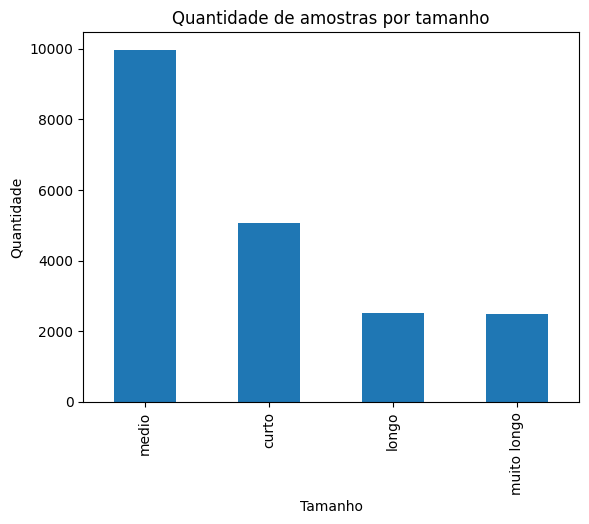

In [10]:
import matplotlib.pyplot as plt
#montando um grafico de barras com a quantidade de amostras por tamanho
df_sample["Tamanho"].value_counts().plot(kind="bar")
plt.title("Quantidade de amostras por tamanho")
plt.xlabel("Tamanho")
plt.ylabel("Quantidade")
plt.xticks(rotation=90)
plt.show()


In [24]:
#salvando o dataframe amostrado em um arquivo csv
df_sample.to_csv("data/sample/sample_train_tamanho100000.csv", index=False)

## fazendo a concatenaçao para validacao


In [25]:
df_a_valid = pd.read_excel("data/recognasum/validation.xlsx")
df_b_valid = pd.read_json("data/xlsum/portuguese_val.jsonl",lines=True)

In [9]:
df_a_valid.head()

,Unnamed: 0,index,Titulo,Subtitulo,Noticia,Categoria,Autor,Data,URL,Autor_corrigido,Sumario
0,0,123170,PGR denuncia deputada Iracema Portella por sup...,Deputada do Centrão é suspeita de ter recebido...,"Procurada, a defesa da parlamentar enviou a se...",Política,"Por Márcio Falcão e Fernanda Vivas, TV Globo —...",09/06/2020 16h44,https://g1.globo.com/politica/noticia/2020/06/...,"Márcio Falcão, Fernanda Vivas",PGR denuncia deputada Iracema Portella por sup...
1,1,68308,Câncer de pulmão pode ter relação com históric...,Médicos procuram nova abordagem para entender ...,"Atualmente, a detecção do câncer de pulmão é r...",Ciência e Tecnologia,Fernanda Lopes SoldateliAdriano Camargo,03/01/2023 16h00,https://olhardigital.com.br/2023/01/03/medicin...,"Fernanda Lopes Soldateli, Adriano Camargo",Câncer de pulmão pode ter relação com históric...
2,2,59497,Manuela D'Ávila diz que não vai concorrer nas ...,"Em publicação nas redes sociais, a ex-deputada...","Neste sábado (28), a ex-deputada federal Manue...",Política,iG Último Segundo,28/05/2022 11:34,https://ultimosegundo.ig.com.br/politica/2022-...,iG Último Segundo,Manuela D'Ávila diz que não vai concorrer nas ...
3,3,132176,"Covid: Em alta, média móvel de mortes fica em ...",Desde o início da pandemia foram 689.998 morte...,A média móvel de mortes causadas pela covid-19...,Saúde,UOL,01/12/2022 19h00Atualizada em 01/12/2022 20h48,https://noticias.uol.com.br/saude/ultimas-noti...,UOL,"Covid: Em alta, média móvel de mortes fica em ..."
4,4,132215,"Brasil registra 7,7 mil novos casos de covid-1...","Em boletim divulgado hoje (19), o Ministério d...","Em boletim divulgado hoje (19), o Ministério d...",Saúde,UOL,19/11/2022 19h27,https://noticias.uol.com.br/saude/ultimas-noti...,UOL,"Brasil registra 7,7 mil novos casos de covid-1..."


In [26]:
#removendo as colunas que nao serao usadas
df_a_valid = df_a_valid[["Noticia","Categoria", "Sumario"]]
df_b_valid = df_b_valid[["text","summary"]]

#adicionando a coluna categoria ao df_b e colocando todos os dados como none
df_b_valid["Categoria"] = "None"

#renomeando as colunas para ficarem iguais
df_b_valid = df_b.rename(columns={"text": "Noticia", "summary": "Sumario"})

df_b_valid.head()

,Noticia,Sumario,Categoria
0,"Na última sexta-feira, um atirador abriu fogo ...",A comunidade de Newtown deu início nesta segun...,None
1,"Segundo organização, sistema de aposentadorias...",A Organização para a Cooperação e Desenvolvime...,None
2,Nenhum deles é torturado ou forçado a dormir a...,"Em Manchester, a que não chamarei de “a Juiz d...",None
3,Uma das principais causas da resistência bacte...,"No final de janeiro, a estudante macapaense Ad...",None
4,"No início da tarde desta quinta-feira, o euro ...",O dólar registrou nesta quinta-feira novas bai...,None


In [27]:
#concatenando os dois dataframes
df_valid = pd.concat([df_a_valid, df_b_valid], ignore_index=True)


In [28]:
len(df_valid)

84456

In [29]:
#criando uma nova coluna com o numero de caracteres da noticia
df_valid["Tamanho_noticia"] = df_valid["Noticia"].apply(lambda x: len(x.split()))
#adicionando colunas curto, medio, longo e muito longo
df_valid["Tamanho"] = "curto"
df_valid.loc[df_valid["Tamanho_noticia"] > 201, "Tamanho"] = "medio"
df_valid.loc[df_valid["Tamanho_noticia"] > 621, "Tamanho"] = "longo"
df_valid.loc[df_valid["Tamanho_noticia"] > 1000, "Tamanho"] = "muito longo"


In [15]:
df_valid.head()

,Noticia,Categoria,Sumario,Tamanho_noticia,Tamanho
0,"Procurada, a defesa da parlamentar enviou a se...",Política,PGR denuncia deputada Iracema Portella por sup...,247,medio
1,"Atualmente, a detecção do câncer de pulmão é r...",Ciência e Tecnologia,Câncer de pulmão pode ter relação com históric...,448,medio
2,"Neste sábado (28), a ex-deputada federal Manue...",Política,Manuela D'Ávila diz que não vai concorrer nas ...,196,curto
3,A média móvel de mortes causadas pela covid-19...,Saúde,"Covid: Em alta, média móvel de mortes fica em ...",134,curto
4,"Em boletim divulgado hoje (19), o Ministério d...",Saúde,"Brasil registra 7,7 mil novos casos de covid-1...",133,curto


In [30]:
df_sample_valid, _ = train_test_split(
    df_valid,
    train_size=10000,
    stratify=df_valid["Tamanho"],
    random_state=42
)

In [31]:
len(df_sample_valid)

10000

In [32]:
#criando csv de validacao
df_sample_valid.to_csv("data/sample/sample_valid_10000.csv", index=False)